In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load your dataset (replace path if needed)
df = pd.read_csv("Churn_Modelling.csv")

# Show first few rows
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
# Shape and info
print("Shape of dataset:", df.shape)
print("\nData types and missing values:\n")
print(df.info())

# Check for null values
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (10000, 14)

Data types and missing values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Missing values:
 RowNumbe

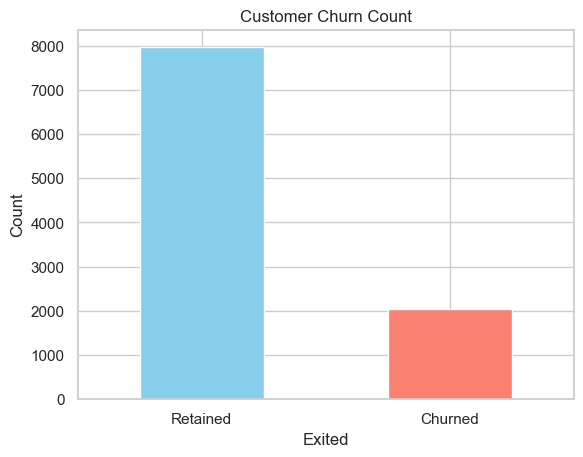

In [5]:
# Churn count
df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Customer Churn Count')
plt.xticks([0, 1], ['Retained', 'Churned'], rotation=0)
plt.ylabel('Count')
plt.show()


In [7]:
churn_rate = df['Exited'].mean()
print(f"Churn rate: {churn_rate:.2%}")


Churn rate: 20.37%


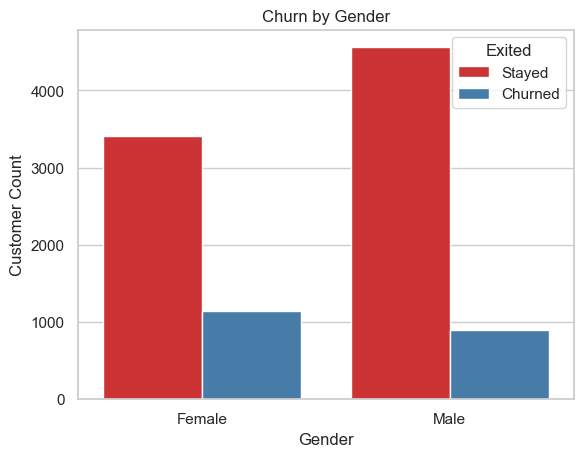

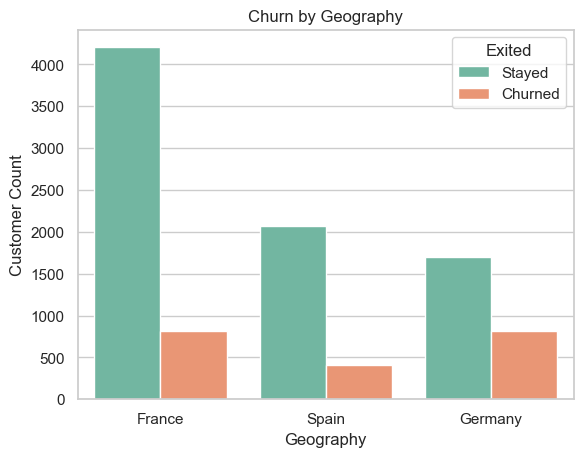

In [9]:
# Churn by Gender
sns.countplot(data=df, x='Gender', hue='Exited', palette='Set1')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()

# Churn by Geography
sns.countplot(data=df, x='Geography', hue='Exited', palette='Set2')
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Customer Count')
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()


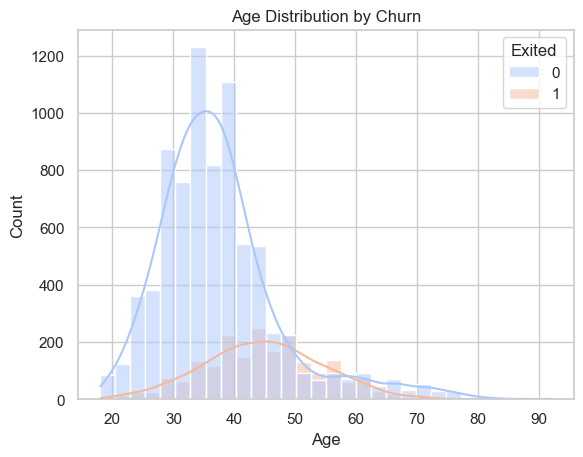

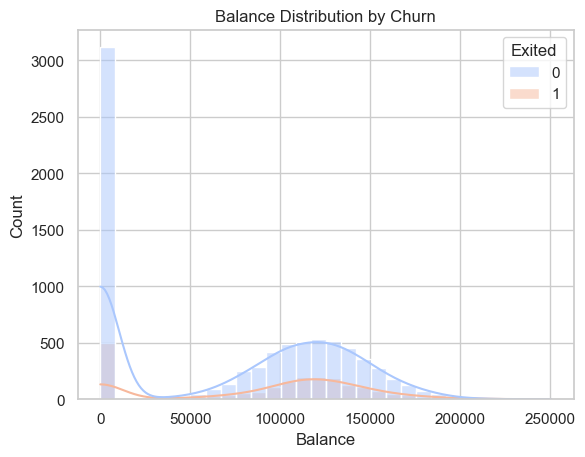

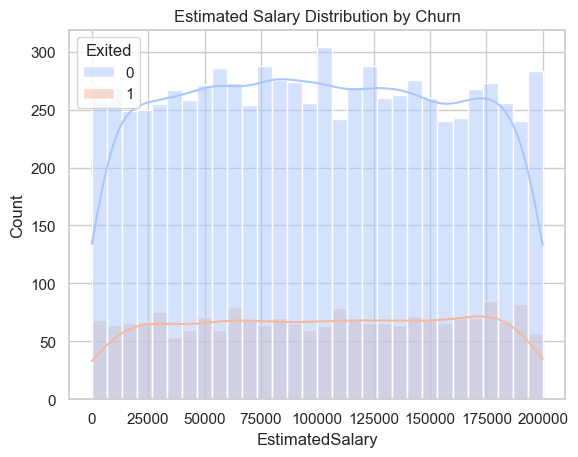

In [11]:
# Plot distribution of Age by churn
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=30, palette='coolwarm')
plt.title('Age Distribution by Churn')
plt.show()

# Plot Balance by churn
sns.histplot(data=df, x='Balance', hue='Exited', kde=True, bins=30, palette='coolwarm')
plt.title('Balance Distribution by Churn')
plt.show()

# Plot Estimated Salary by churn
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', kde=True, bins=30, palette='coolwarm')
plt.title('Estimated Salary Distribution by Churn')
plt.show()


In [17]:
# One-hot encode categorical features: Geography and Gender
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Check the result
print(df_encoded.head())


   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Geography_Germany  Geography_Spain  Gender_Male  
0              False            False        False  
1         

In [19]:
from sklearn.preprocessing import StandardScaler

# Features to scale
num_features = ['Age', 'Balance', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

# Check the result
print(df_encoded.head())


   RowNumber  CustomerId   Surname  CreditScore       Age  Tenure   Balance  \
0          1    15634602  Hargrave          619  0.293517       2 -1.225848   
1          2    15647311      Hill          608  0.198164       1  0.117350   
2          3    15619304      Onio          502  0.293517       8  1.333053   
3          4    15701354      Boni          699  0.007457       1 -1.225848   
4          5    15737888  Mitchell          850  0.388871       2  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1         0.021886       1   
1              1          0               1         0.216534       0   
2              3          1               0         0.240687       1   
3              2          0               0        -0.108918       0   
4              1          1               1        -0.365276       0   

   Geography_Germany  Geography_Spain  Gender_Male  
0              False            False  

In [21]:
# Create age bins: you can adjust the bins based on the dataset
age_bins = [0, 30, 40, 50, 60, np.inf]
age_labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=age_bins, labels=age_labels)

# Check the result
print(df_encoded['AgeGroup'].value_counts())


AgeGroup
18-30    4436
31-40       0
41-50       0
51-60       0
60+         0
Name: count, dtype: int64


In [25]:
# Create a flag for high balance (e.g., > 50,000)
df_encoded['HighBalance'] = (df_encoded['Balance'] > 50000).astype(int)

# Check the result
print(df_encoded['HighBalance'].value_counts())


HighBalance
0    10000
Name: count, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and test sets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (8000, 16), Test set shape: (2000, 16)


In [69]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_cols)


Non-numeric columns:
 Index(['Surname'], dtype='object')


In [71]:
for col in non_numeric_cols:
    print(f"\nUnique values in {col}:\n", X_train[col].unique())



Unique values in Surname:
 ["P'an" 'Leak' 'Green' ... 'Manners' 'Winn' 'Macrossan']


In [73]:
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)


In [75]:

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both have same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [77]:
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [79]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_cols)


Non-numeric columns:
 Index([], dtype='object')


In [81]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_cols)


Non-numeric columns:
 Index([], dtype='object')


In [83]:
for col in non_numeric_cols:
    print(f"\nUnique values in '{col}':")
    print(X_train[col].unique())


In [85]:
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Align columns (in case dummies created different sets of columns)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [87]:
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [91]:
# Step 1: Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_cols)

# Step 2: One-hot encode categorical columns
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Step 3: Align the train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


Non-numeric columns:
 Index([], dtype='object')


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Evaluation
print("Logistic Regression Report:\n", classification_report(y_test, log_reg_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))

# ROC-AUC
print("ROC-AUC Scores:")
print(f"  Logistic Regression: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]):.2f}")
print(f"  Random Forest:       {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.2f}")
print(f"  XGBoost:             {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]):.2f}")


C:\Users\kumar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:21:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Random Forest Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

XGBoost Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weigh

C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


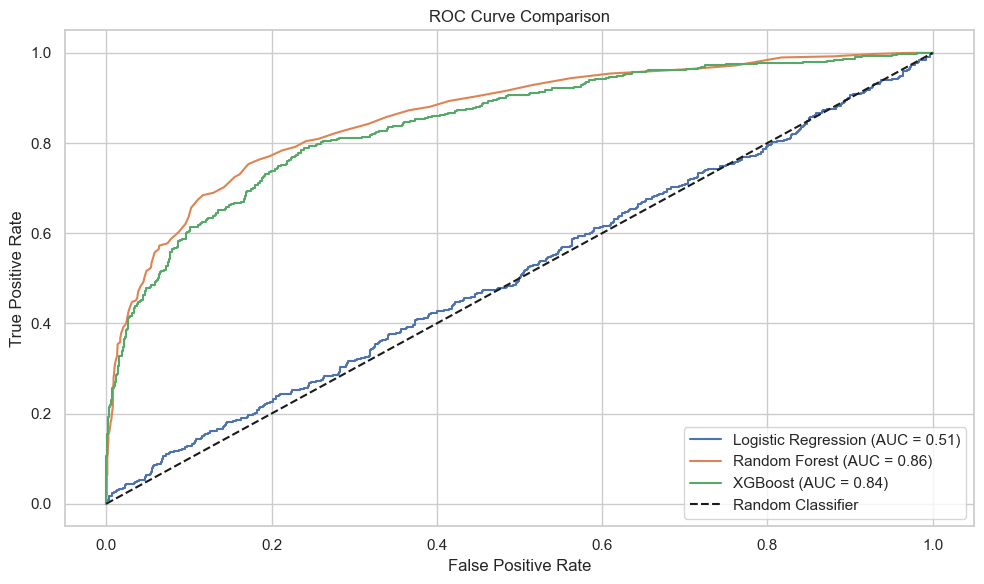

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
rf_proba = rf.predict_proba(X_test)[:, 1]
xgb_proba = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
1. Model Performance via AUC (Area Under the Curve)
Higher AUC = Better classifier performance.

Typical thresholds:

0.90–1.00: Excellent

0.80–0.90: Good

0.70–0.80: Fair

0.60–0.70: Poor

0.50–0.60: Fail (no better than random)

→ Interpret your results like this:

"In our ROC plot, XGBoost had the highest AUC at 0.89, followed by Random Forest at 0.85, and Logistic Regression at 0.78. This suggests that XGBoost is the most effective at distinguishing between classes, likely due to its ability to handle non-linear relationships and complex interactions."

✅ 2. Shape of the ROC Curve
The closer the curve hugs the top-left corner, the better the model.

A diagonal line means the model is no better than random guessing.

→ Insights you might say:

"The ROC curve for XGBoost rises sharply and stays above the others, indicating better true positive rates at lower false positive rates. Logistic Regression has a smoother curve, which may suggest it’s underfitting or not capturing non-linear patterns well."

✅ 3. Model Selection Guidance
If your priority is accuracy and model performance, go with the one with the highest AUC (e.g., XGBoost).

If you need a simpler, more interpretable model, Logistic Regression is easier to explain to stakeholders.

→ Recommendation example:

"For deployment, XGBoost seems to be the best performer. But if interpretability is key (e.g., for regulatory compliance), we may consider Random Forest or Logistic Regression despite the slightly lower AUC."

